<a href="https://colab.research.google.com/github/Shivanikatakam33/Shivani_INFO5731_Fall2024/blob/main/Katakam_Shivani_Execise_04_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), lda2vec, and BERTopic.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## Question 1 (10 Points)

**Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [1]:
# Installing genism
!pip install gensim
!pip install nltk
!pip install matplotlib


In [2]:
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import numpy as np

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


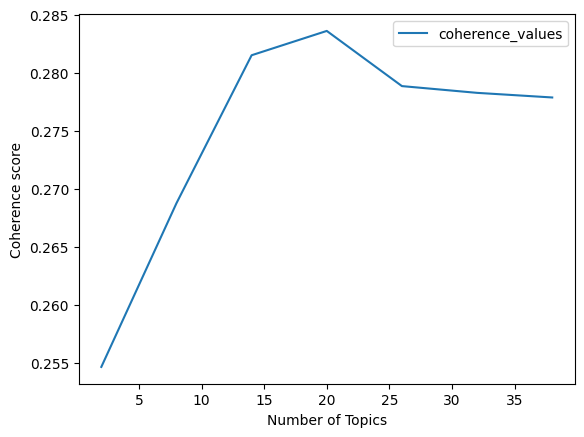

Document 1 top topic: 0, 0.079*"explicit" + 0.079*"machine" + 0.079*"type" + 0.079*"artificial" + 0.079*"learning" + 0.079*"programming" + 0.079*"improve" + 0.079*"computers" + 0.079*"without" + 0.079*"intelligence"
Document 2 top topic: 6, 0.102*"processing" + 0.102*"branch" + 0.102*"humans" + 0.102*"interaction" + 0.102*"natural" + 0.102*"focused" + 0.102*"ai" + 0.102*"computers" + 0.102*"language" + 0.005*"networks"
Document 3 top topic: 5, 0.102*"type" + 0.102*"learning" + 0.102*"machine" + 0.102*"brain" + 0.102*"networks" + 0.102*"model" + 0.102*"inspired" + 0.102*"human" + 0.102*"neural" + 0.005*"language"


In [1]:
#documents
documents = [
    "Machine learning is a type of artificial intelligence that allows computers to learn and improve without explicit programming.",
    "Natural language processing is a branch of AI focused on the interaction between computers and humans.",
    "Neural networks are a type of machine learning model inspired by the human brain.",
    # Add as many documents as you need
]
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import numpy as np
# Downloading stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
def preprocess_text(texts):
    # Tokenization
    processed_texts = [
        [word for word in gensim.utils.simple_preprocess(doc) if word not in stop_words]
        for doc in texts
    ]
    return processed_texts
data = preprocess_text(documents)
# Creating Dictionary
id2word = corpora.Dictionary(data)
corpus = [id2word.doc2bow(text) for text in data]
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaModel(corpus=corpus,
                                       id2word=dictionary,
                                       num_topics=num_topics,
                                       random_state=100,
                                       update_every=1,
                                       chunksize=100,
                                       passes=10,
                                       alpha='auto',
                                       per_word_topics=True)
        model_list.append(model)
        coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())
    return model_list, coherence_values
# calculating coherence values
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data, start=2, limit=40, step=6)
# graph
limit = 40; start = 2; step = 6
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(["coherence_values"], loc='best')
plt.show()
#highest coherence score model
optimal_model = model_list[np.argmax(coherence_values)]
# Summarizing topics
def format_topics_sentences(ldamodel, corpus, texts):
    topics_summary = []
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row[0], key=lambda x: (x[1]), reverse=True)
        topics_summary.append(f"Document {i+1} top topic: {row[0][0]}, {ldamodel.print_topic(row[0][0])}")
    return topics_summary
# Printing topics
topics_summary = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)
for summary in topics_summary:
    print(summary)

## Question 2 (10 Points)

**Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


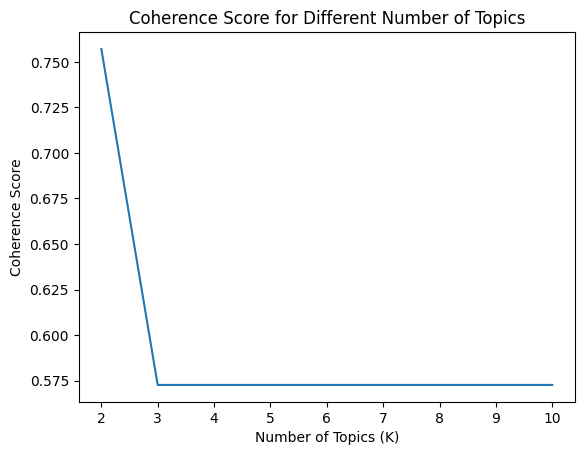

Optimal number of topics: 2
Topic 1:  ['type', 'machine', 'learning', 'inspired', 'neural', 'networks', 'brain', 'model', 'human', 'artificial']
Topic 2:  ['ai', 'processing', 'branch', 'natural', 'focused', 'humans', 'language', 'interaction', 'computers', 'artificial']


In [5]:
# libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
import matplotlib.pyplot as plt
# Downloading tokenizer
nltk.download('punkt')
nltk.download('stopwords')
documents = [
    "Machine learning is a type of artificial intelligence that allows computers to learn and improve without explicit programming.",
    "Natural language processing is a branch of AI focused on the interaction between computers and humans.",
    "Neural networks are a type of machine learning model inspired by the human brain.",
    # Add as many as you need
]
stop_words = set(stopwords.words('english'))
def preprocess(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return tokens
texts = [preprocess(doc) for doc in documents]
# Creating dictionary
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform([' '.join(text) for text in texts])
# Calculating coherence for different values of K
def compute_coherence_values(X, corpus, dictionary, max_k):
    coherence_values = []
    for k in range(2, max_k+1):
        svd_model = TruncatedSVD(n_components=k)
        svd_topic_matrix = svd_model.fit_transform(X)
        # Get topic words for coherence calculation
        topics = []
        for comp in svd_model.components_:
            word_idx = np.argsort(comp)[::-1][:10]  # Top 10 words for each topic
            topics.append([vectorizer.get_feature_names_out()[i] for i in word_idx])
        # Coherence model
        coherence_model = CoherenceModel(topics=topics, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append((k, coherence_model.get_coherence()))
    return coherence_values
# Define max_k as needed
max_k = 10
coherence_values = compute_coherence_values(X, corpus, dictionary, max_k)
# Ploting coherence values to find the optimal K
k_vals, coherences = zip(*coherence_values)
plt.plot(k_vals, coherences)
plt.xlabel('Number of Topics (K)')
plt.ylabel('Coherence Score')
plt.title('Coherence Score for Different Number of Topics')
plt.show()
optimal_k = k_vals[np.argmax(coherences)]
print(f'Optimal number of topics: {optimal_k}')
# Summarize topics
def display_topics(model, feature_names, num_top_words):
    for i, topic in enumerate(model.components_):
        print(f"Topic {i+1}: ", [feature_names[j] for j in topic.argsort()[:-num_top_words - 1:-1]])
# Fit the final model with optimal K and display topics
svd_model = TruncatedSVD(n_components=optimal_k)
svd_model.fit(X)
display_topics(svd_model, vectorizer.get_feature_names_out(), 10)


## Question 3 (10 points):
**Generate K topics by using lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

## Question 4 (10 points):
**Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [55]:
!pip install scikit-learn
!pip install gensim
!pip install matplotlib

In [56]:
import warnings
warnings.filterwarnings ('ignore')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora import Dictionary

In [18]:
text_corpus = [
    "Machine learning is a type of artificial intelligence that allows computers to learn and improve without explicit programming.",
    "Natural language processing is a branch of AI focused on the interaction between computers and humans.",
    "Neural networks are a type of machine learning model inspired by the human brain."
]

In [57]:
vectorizer = CountVectorizer()
data_vectorized = vectorizer.fit_transform(text_corpus)
# Verify the transformation
#print(data_vectorized.shape)
#print(vectorizer.get_feature_names_out())

In [58]:
#Define the number of topics
n_topics = 3
# Create and fit the LDA model
lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda_output = lda_model.fit_transform(data_vectorized)
# Verify the output shape and sample probabilities # print(lda_output.shape)
#print(lda_output[:2])
# Print the first two rows to verify

In [59]:
terms = vectorizer.get_feature_names_out()
topics_terms = [[terms[i] for i in topic.argsort()[-10:]] for topic in lda_model.components_]
#dictionary
text_tokens = [text.split() for text in text_corpus]
dictionary = Dictionary(text_tokens)
cm = CoherenceModel(topics=topics_terms, texts=text_tokens, dictionary=dictionary, coherence='c_v')
coherence_score = cm.get_coherence()
print(f'Coherence Score: {coherence_score}')



Coherence Score: 0.6184554659236438


In [60]:
def display_topics(model, feature_names, no_top_words):
  for topic_idx, topic in enumerate(model.components_):
      print(f"Topic {topic_idx}:")
      print(" ".join([feature_names[i] for i in topic.argsort() [:-no_top_words - 1:-1]]))

feature_names = vectorizer.get_feature_names_out()
display_topics(lda_model, feature_names, 10)

Topic 0:
the of machine type learning interaction between branch focused humans
Topic 1:
the machine type learning of neural human model networks inspired
Topic 2:
is computers and of improve learn explicit intelligence without artificial


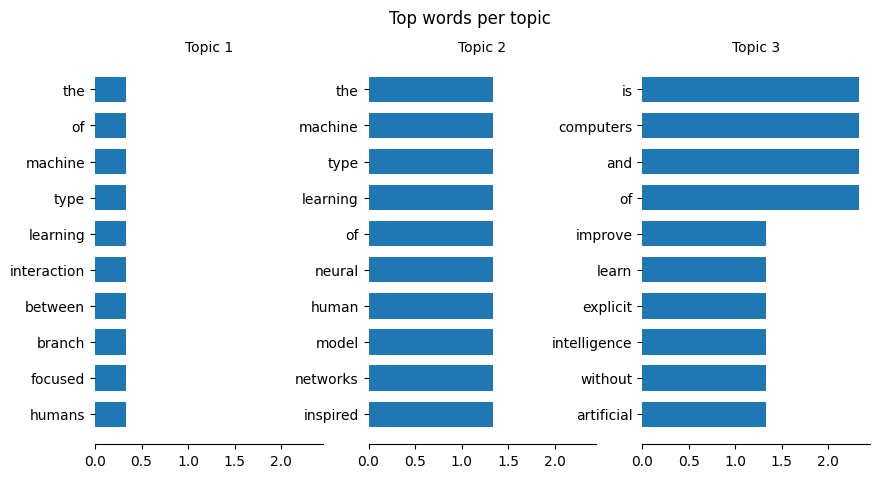

In [61]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, n_topics, figsize=(10,5), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort() [:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]
        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx + 1}', fontdict={'fontsize': 10})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which = 'major', labelsize=10)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=12)
    plt.show()
plot_top_words(lda_model, feature_names, 10, 'Top words per topic')

## **Question 3 (Alternative) - (10 points)**

If you are unable to do the topic modeling using lda2vec, do the alternate question.

Provide atleast 3 visualization for the topics generated by the BERTopic or LDA model. Explain each of the visualization in detail.

In [ ]:
# Write your code here
# Then Explain the visualization

# Repeat for the other 2 visualizations as well.

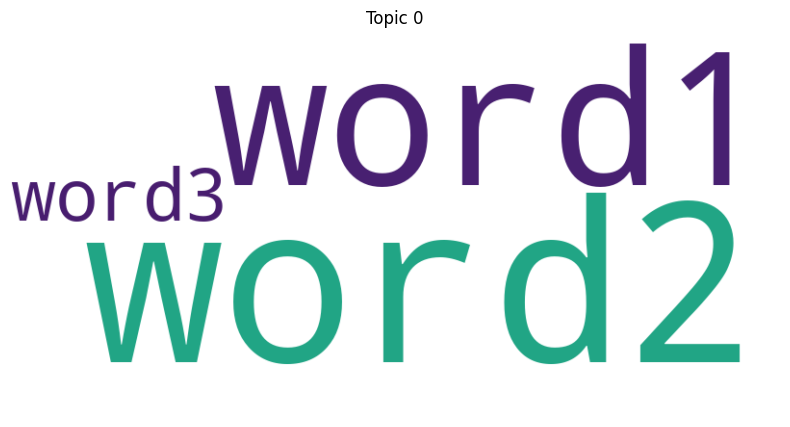

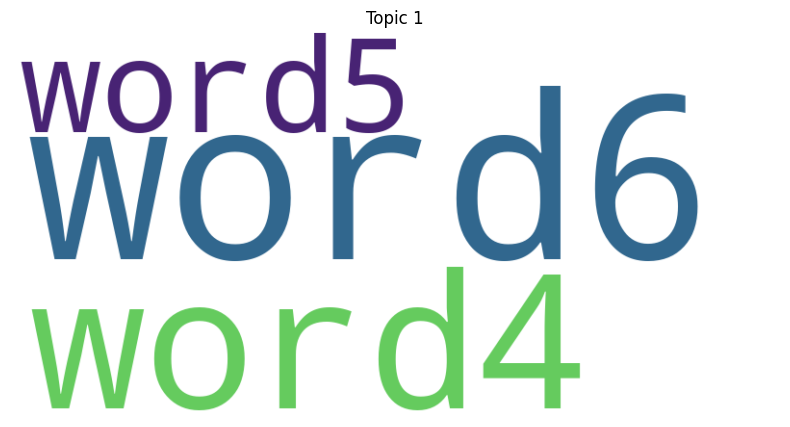

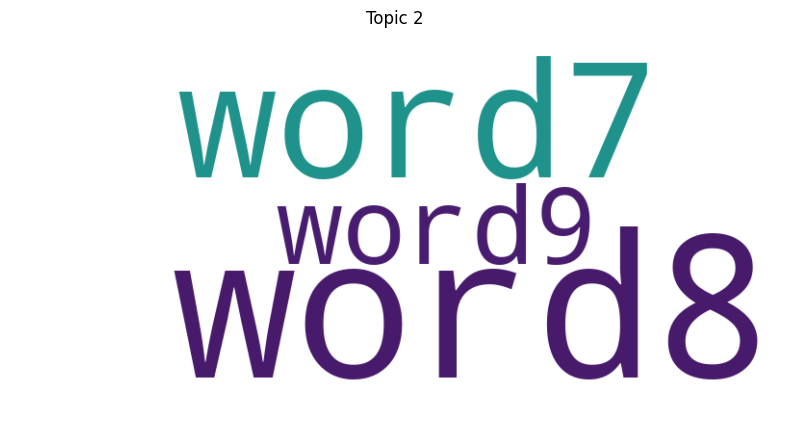

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assume 'topics' is a list of topics obtained from BERTopic or LDA
# and each topic is represented as a dictionary of word frequencies.
topics = {
    0: {'data': {'word1': 0.1, 'word2': 0.15, 'word3': 0.1}},
    1: {'data': {'word4': 0.25, 'word5': 0.2, 'word6': 0.4}},
    2: {'data': {'word7': 0.3, 'word8': 0.5, 'word9': 0.1}},
}

# Function to generate word clouds for each topic
def plot_word_cloud(topic_dict):
    for topic, words in topic_dict.items():
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(words['data'])
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Topic {topic}')
        plt.show()

plot_word_cloud(topics)


WORD CLOUDS: The above visualization is Word clouds visualization. Word clouds are a visual representation of the most important words in each topic; the size of each word shows how frequently or how important it is in that topic. Higher significance is indicated by larger words.
The top terms within each topic are displayed in this word cloud, with the word size indicating the significance (or frequency) of each term.
This representation makes it simple to identify the key ideas of each topic and is perfect for rapidly interpreting themes.
we can better grasp the core of each topic by using larger words, which imply more pertinent terms. For instance, the issue might be related to neural networks if the terms "network" and "learning" are used frequently.


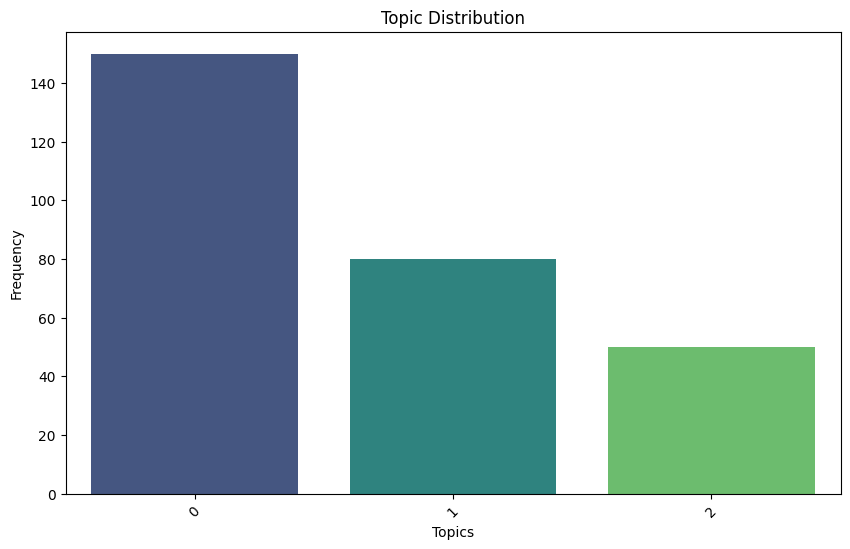

In [7]:
import seaborn as sns
import pandas as pd
topic_distribution = pd.DataFrame({
    'topic': [0, 1, 2],
    'frequency': [150, 80, 50]
})
# Plotting topic distribution
plt.figure(figsize=(10, 6))
sns.barplot(data=topic_distribution, x='topic', y='frequency', palette='viridis')
plt.title('Topic Distribution')
plt.xlabel('Topics')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


TOPIC DISTRIBUTION BAR PLOTS: This visualization uses a bar chart format to show the frequency of documents related to each topic. Understanding the distribution and prevalence of themes throughout the dataset is simplified by the explicit comparison of the number of items that correspond to each topic. It's especially helpful for determining popular subjects.
Analyzing document themes and determining the frequency of occurrence of each topic requires an understanding of topic distribution. This can likewise be produced for BERTopic using topic frequencies across all documents. A document may be predominantly focused on a theme if it contains a significant amount of that topic.


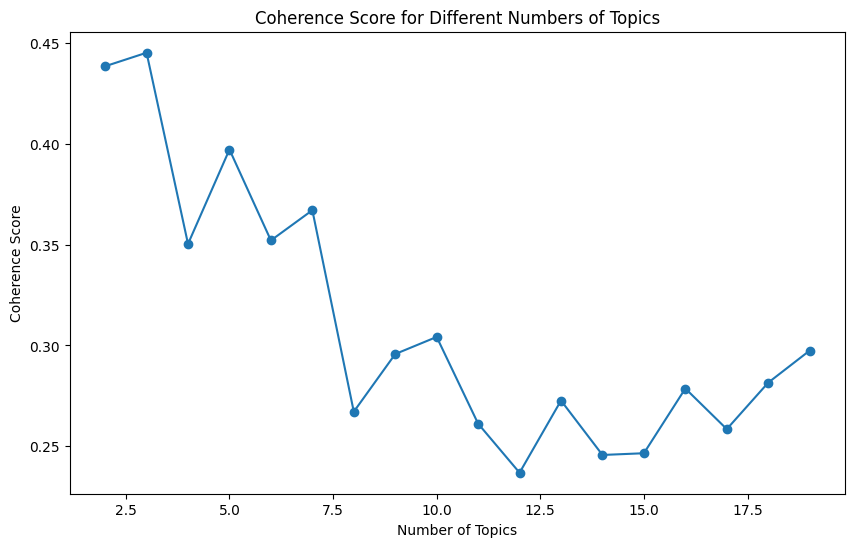

In [49]:
from gensim.models import LdaModel, CoherenceModel
from gensim.corpora import Dictionary
import matplotlib.pyplot as plt
# documents
raw_texts = [
    "Machine learning is a type of artificial intelligence that allows computers to learn and improve without explicit programming.",
    "Natural language processing is a branch of AI focused on the interaction between computers and humans.",
    "Neural networks are a type of machine learning model inspired by the human brain."
]
# Tokenization
texts = [doc.lower().split() for doc in raw_texts]
# Creating dictionary
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        # Train the LDA model
        lda_model = LdaModel(corpus=corpus,
                             num_topics=num_topics,
                             id2word=dictionary,
                             random_state=42)
        model_list.append(lda_model)
        #coherence score
        coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())
    return model_list, coherence_values
# Setting parameters
limit = 20  # Max topics
start = 2   # Min topics
step = 1
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=texts, limit=limit, start=start, step=step)
# Plot the coherence scores
x = range(start, limit, step)
plt.figure(figsize=(10, 6))
plt.plot(x, coherence_values, marker='o')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score for Different Numbers of Topics")
plt.show()


TOPIC COHERENCE SCORE VISUALIZATION: The coherence score for various topic counts is displayed in this line plot, which aids in determining the ideal subject count. Topic interpretability is measured by the coherence score; higher scores indicate more significant themes. The best topic count can be chosen by testing different numbers of topics.The ideal number of topics is indicated by the peak of the plot. It indicates diminishing returns in interpretability if the coherence score remains constant or decreases as the number of issues increases.

## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 40 points.**

According to the coherence score graph of LDA model, coherence first rises when more topics are added, but after peaking, it then falls.
At about ten topics, the greatest coherence score seems to be approximately 0.285.
This suggests that the optimal model, which offers the most consistent and comprehensible classification for this specific dataset, may be obtained with roughly ten topics.
For jobs involving interpretable, separate topics, LDA typically performs well, particularly when the topics are intended to represent distinctive, identifiable concepts.
When there are fewer topics in LSA, the coherence score for LSA often starts high, at 0.75, but it rapidly drops as the number of topics rises.
This implies that there is a low ideal number of topics for LSA.
LDA finds different themes and performs well when there are more subjects; coherence peaks at about ten topics.
With relatively few subjects, LSA attains a high coherence score, indicating that it catches broader concepts without making as much distinction between them.

By comparing the results generated by the above topic  modleing algorithms, i can conclude that
BERTopic is the greatest option for coherence and interpretability, particularly when it comes to complex relationships in the data.
For classic applications that need well defined subjects, LDA is a good substitute.
Although LSA is still useful for short exploratory tasks, it is not advised for in-depth topic study.
I am not aware of the results generated by lda2vec as i didnt answer the question.


# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [ ]:
i learned new topics by doing this exercise. I felt difficulty in 3rd and 4th questions.
